Given a string s, find the first non-repeating character in it and return its index. If it does not exist, return -1.

##### Example 1:
Input: s = "leetcode" <br>
Output: 0

##### Example 2:
Input: s = "loveleetcode" <br>
Output: 2

##### Example 3:
Input: s = "aabb" <br>
Output: -1

In [1]:
def firstUniqChar(s) -> int:
    refDict = {}
    
    for i in s:
        if i in refDict:
            refDict[i] +=1
        else:
            refDict[i]=1
    
    for idx, char in enumerate(s):
        if refDict[char]==1:
            return idx
    return -1

Test

In [2]:
import unittest

class TestFirstUniqChar(unittest.TestCase):
    
    def test_firstUniqChar_empty(self):
        self.assertEqual(firstUniqChar(""), -1)
        
    def test_firstUniqChar_1(self):
        self.assertEqual(firstUniqChar("leetcode"), 0)
    
    def test_firstUniqChar_2(self):
        self.assertEqual(firstUniqChar("loveleetcode"), 2)
    
    def test_firstUniqChar_3(self):
        self.assertEqual(firstUniqChar("aabb"), -1)
        
unittest.main(argv=['', 'TestFirstUniqChar'], verbosity=3, exit=False)


test_firstUniqChar_1 (__main__.TestFirstUniqChar) ... ok
test_firstUniqChar_2 (__main__.TestFirstUniqChar) ... ok
test_firstUniqChar_3 (__main__.TestFirstUniqChar) ... ok
test_firstUniqChar_empty (__main__.TestFirstUniqChar) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK



You are given a stream of points on the X-Y plane. Design an algorithm that:

- **Adds** new points from the stream into a data structure. **Duplicate** points are allowed and should be treated as different points.
- Given a query point, **counts** the number of ways to choose three points from the data structure such that the three points and the query point form an **axis-aligned square** with positive area.

An **axis-aligned square** is a square whose edges are all the same length and are either parallel or perpendicular to the x-axis and y-axis.

Implement the DetectSquares class:

- ```DetectSquares()``` Initializes the object with an empty data structure.
- ```void add(int[] point)``` Adds a new point ```point = [x, y]``` to the data structure.
- ```int count(int[] point)``` Counts the number of ways to form **axis-aligned squares** with point ```point = [x, y]``` as described above.


##### Example

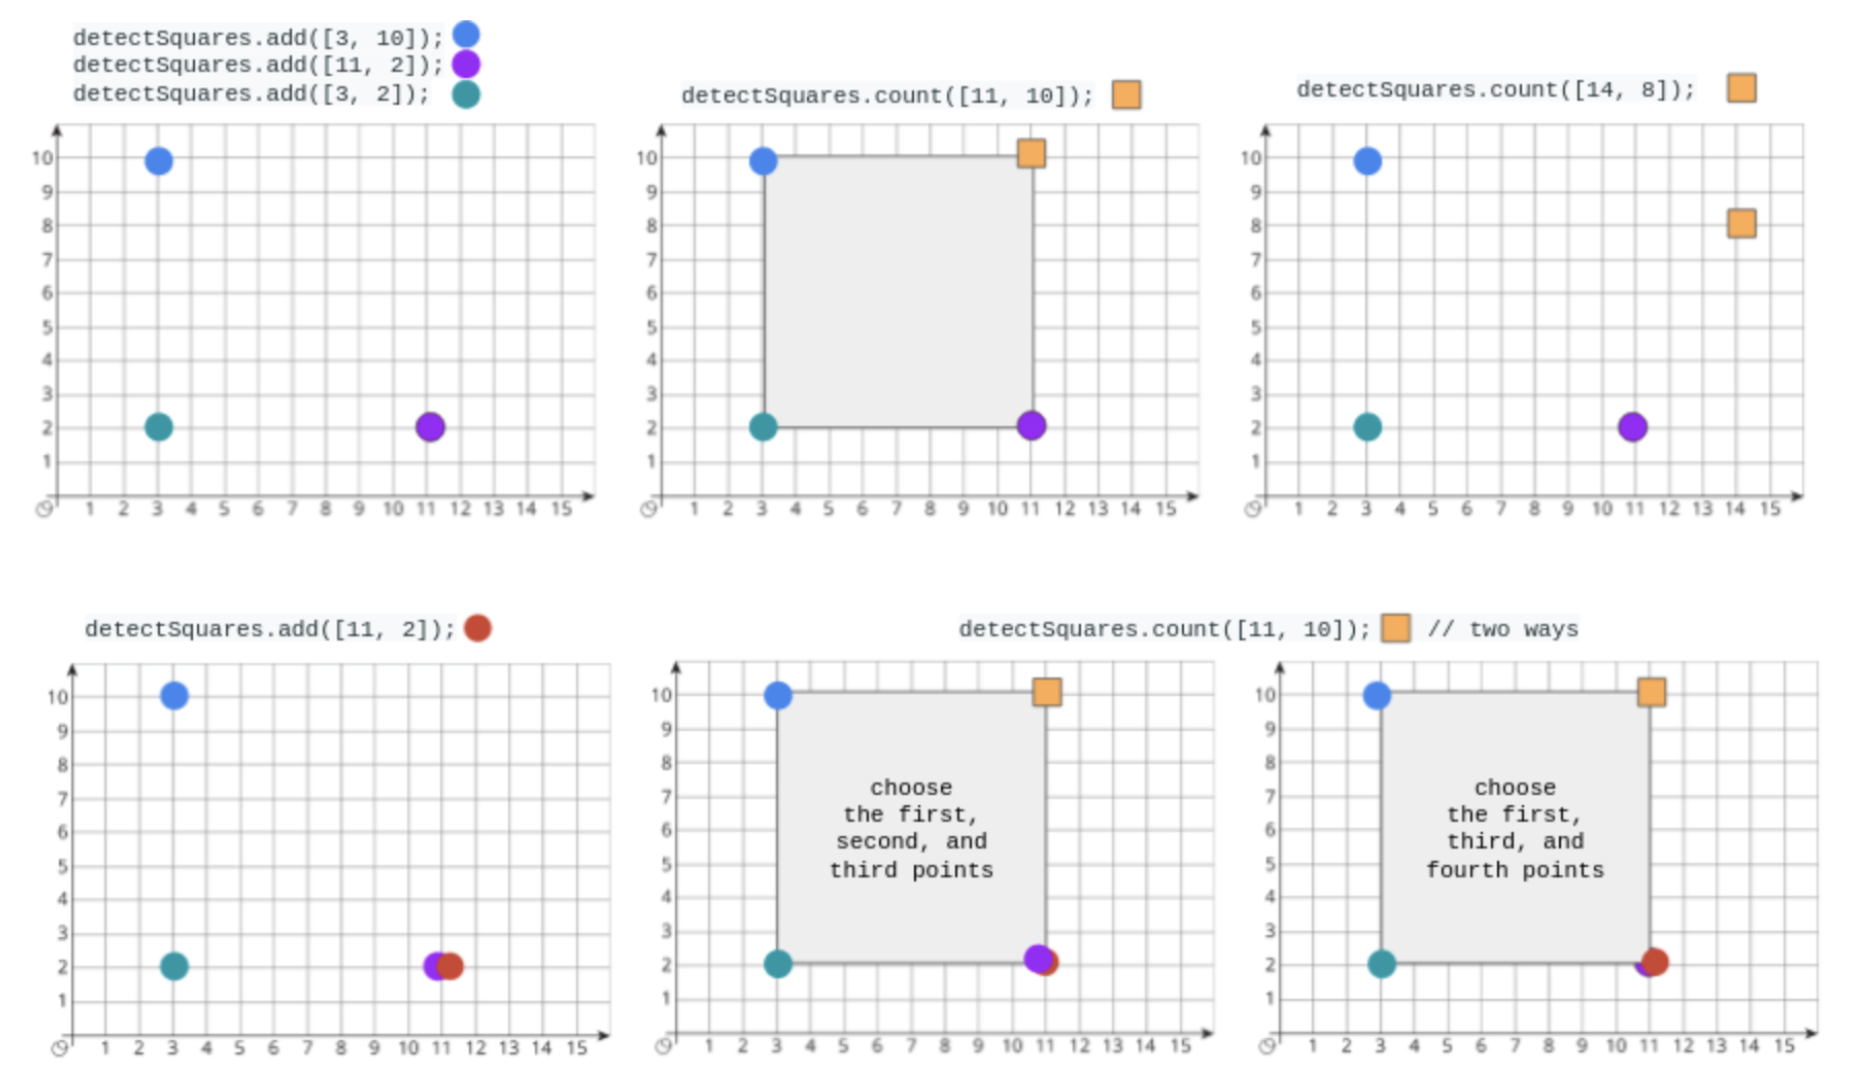

```
Input
["DetectSquares", "add", "add", "add", "count", "count", "add", "count"]
[[], [[3, 10]], [[11, 2]], [[3, 2]], [[11, 10]], [[14, 8]], [[11, 2]], [[11, 10]]]
Output
[null, null, null, null, 1, 0, null, 2]

Explanation
DetectSquares detectSquares = new DetectSquares();
detectSquares.add([3, 10]);
detectSquares.add([11, 2]);
detectSquares.add([3, 2]);
detectSquares.count([11, 10]); // return 1. You can choose:
                               //   - The first, second, and third points
detectSquares.count([14, 8]);  // return 0. The query point cannot form a square with any points in the data structure.
detectSquares.add([11, 2]);    // Adding duplicate points is allowed.
detectSquares.count([11, 10]); // return 2. You can choose:
                               //   - The first, second, and third points
                               //   - The first, third, and fourth points
```

In [71]:
class DetectSquares:
    
    def __init__(self):
        self.list_ = []
        
    def add(self, point) -> None:
        self.list_.append(point)
        
    def count(self, point) -> int:
        if len(self.list_)>2:
            x = self.list_.copy()
            x.append(point)
            counter = 0
            
            idx_list = [i for i in range(len(x))]
            
            possibilities = self.combination(idx_list)
            
            for i in possibilities:
                check_list = [x[i[0]],x[i[1]], x[i[2]], x[i[3]]]
                if self.square(check_list) is True:
                    counter+=1
            return counter
        else:
            return 0
    
    def square(self, list_) -> bool:
        pt1 = list_[0]
        x = pt1[0] 
        y = pt1[1] 

        seenIdx = [0]

        for idx in range(1, len(list_)):
            if x == list_[idx][0]: 
                y_1 = list_[idx][1]
                seenIdx.append(idx)
        if len(seenIdx)!=2:
            return False

        dist = abs(y- y_1)

        next_point = None

        for idx in range(len(list_)):
            if idx not in seenIdx:
                if list_[idx][0] == x+dist or list_[idx][0] == x-dist:
                    if y==list_[idx][1]:
                        seenIdx.append(idx)
                        next_point = list_[idx]
                        break

        if next_point is None:
            return False

        x1 = next_point[0]
        y1 = next_point[1]

        other_point = None

        for i in range(len(list_)):
            if i not in seenIdx:
                other_point = list_[i]

        if other_point[0]==x1 and other_point[1]== y_1:
            return True

        return False
    
    def combination(self, idx_list) -> int:
        from itertools import combinations
        idxs =  [i for i in combinations(idx_list, 4)]
        return idxs     


# Your DetectSquares object will be instantiated and called as such:
# obj = DetectSquares()
# obj.add(point)
# param_2 = obj.count(point)


Test

In [72]:
import unittest

class TestDetectSquares(unittest.TestCase):
    
    def test_detectSquares_empty(self):
        obj = DetectSquares()
        self.assertEqual(obj.count([11, 10]), 0)
        
    def test_detectSquares_1(self):
        obj = DetectSquares()
        points = [[3, 10], [11, 2], [3, 2]]
        for x, y in points:
            obj.add([x, y])
        self.assertEqual(obj.count([11, 10]), 1)
    
    def test_detectSquares_2(self):
        obj = DetectSquares()
        points = [[3, 10], [11, 2], [3, 2]]
        for x, y in points:
            obj.add([x, y])
        self.assertEqual(obj.count([14, 8]), 0)
    
    def test_detectSquares_3(self):
        obj = DetectSquares()
        points = [[3, 10], [11, 2], [3, 2], [11, 2]]
        for x, y in points:
            obj.add([x, y])
        self.assertEqual(obj.count([11, 10]), 2)
    
    def test_detectSquares_4(self):
        obj = DetectSquares()
        points = [[10, 10], [20, 10], [20, 20]]
        for x, y in points:
            obj.add([x, y])
        self.assertEqual(obj.count([10, 20]), 1)

unittest.main(argv=['', 'TestDetectSquares'], verbosity=3, exit=False)

test_detectSquares_1 (__main__.TestDetectSquares) ... ok
test_detectSquares_2 (__main__.TestDetectSquares) ... ok
test_detectSquares_3 (__main__.TestDetectSquares) ... ok
test_detectSquares_4 (__main__.TestDetectSquares) ... ok
test_detectSquares_empty (__main__.TestDetectSquares) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.006s

OK


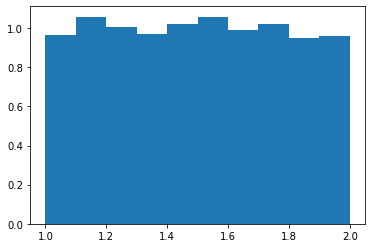

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(1,2,10000)
count, bins, ignore = plt.hist(x, 10, density=True)
plt.show()

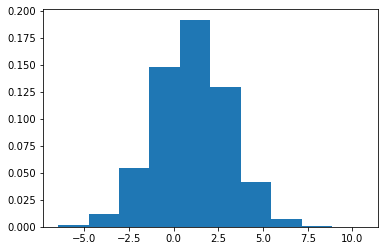

In [9]:
x = np.random.normal(1,2,10000)
count, bins, ignore = plt.hist(x, 10, density=True)
plt.show()

In [24]:
c = np.random.seed(2)

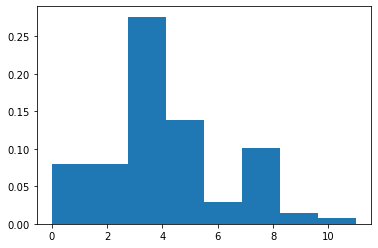

In [28]:
x = np.random.poisson(4, 100)
count, bins, ignored = plt.hist(x, 8, density=True)

In [34]:
x = np.random.binomial(100, p=0.5, size=1000)

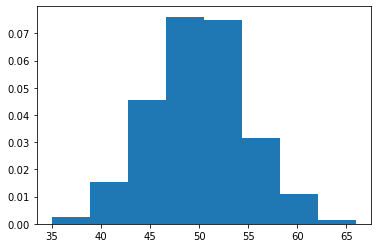

In [35]:
count, bins, ignored = plt.hist(x, 8, density=True)

In [ ]:
## List of 1000 normally distributed numbers
## pick a sample of 50, calculate mean, std error, and confidence interval
## Now pick random sample of 50, 100 times, and see how many times the mean falls in this condfidence interval

In [81]:
import numpy as np

def check_confidence(iterations, sample_, z_score, **kwargs):
    CI, pop = confidence_interval(z_score, **kwargs)
    
    n = kwargs['pop_size']
    
    counter = 0
    
    for iteration in range(iterations): #100
        sample = draw_sample(pop, sample_)
        sample_mean_ = (mean_var(sample, std_error_return = False))
        
        if sample_mean_>=CI[0] and sample_mean_<=CI[1]:
            counter+=1
    return counter/iterations

def population(mean, std_dev, pop_size, sample_size):
    x  = np.random.normal(mean, std_dev, pop_size)
    
    i=0
    seenIdx = []
    sample = []
    while i<sample_size:
        idx = np.random.randint(0,pop_size)
        if idx not in seenIdx:
            seenIdx.append(idx)
            sample.append(x[idx])
            i+=1
    return x, sample
    
def mean_var(arr, std_error_return = True):
    if arr:
        sum_ = 0
        n = len(arr)
        
        for i in arr:
            sum_+=i
        mean =  sum_/n
        
        sum_sq = 0
        
        for i in arr:
            sum_sq+=((i-mean)**2)/(n-1)
            
        std_dev = (sum_sq)**0.5
        std_error = std_dev/len(arr)**0.5
        
        if std_error_return==True:
            return mean, std_dev, std_error
        else:
            return mean
        
def confidence_interval(z_score, **kwargs):
    pop, sample = population(kwargs['mean'], kwargs['std_dev'], kwargs['pop_size'], kwargs['sample_size'])
    sample_mean, sample_std_dev, std_error = mean_var(sample)
    
    upper_CI = sample_mean+(z_score*std_error)
    lower_CI = sample_mean-(z_score*std_error)

    return [lower_CI, upper_CI], pop

def draw_sample(population, size_):
    n = len(population)
    
    i=0
    seenIdx = []
    sample = []
    while i<size_:
        idx = np.random.randint(0,n)
        if idx not in seenIdx:
            seenIdx.append(idx)
            sample.append(population[idx])
            i+=1
    return sample
    

In [99]:
dict_ = {'mean':0, 'std_dev':3, 'pop_size':1000, 'sample_size':30}

check_confidence(1000, 30, 1.96, **dict_)

0.914

In [101]:
np.random.seed(2)

In [119]:

x = np.random.binomial(1000, p=0.5, size = 1000)